In [40]:
import numpy as np
import pandas as pd
import seaborn as sb

In [41]:
countries_to_study = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden", "United States", "South Korea", "Japan", "India",
    "United Kingdom","Canada"
]
len(countries_to_study)


33

# this are the contries(USA,Canada,UK,European(will be treat as a whole),India,South Korean,India,Japen)that is going to be study

In [42]:
path="/Users/catillzhang/Downloads/annual-change-renewables.csv"
data_of_rg = pd.read_csv(path)

# first we upload the dataset 1 for this problem: the usage of clean energy

In [43]:
data_of_rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                5374 non-null   object 
 1   Code                                  4063 non-null   object 
 2   Year                                  5374 non-null   int64  
 3   Renewables (TWh growth - equivalent)  5374 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 168.1+ KB


In [44]:
# 0:Name of that country
# 1:Code(useless in this project)
# 2:Year(form 1965 to 2022)
# 3:Solar and wind electricity per capita

In [45]:
data_of_rg=data_of_rg[data_of_rg['Entity'].isin(countries_to_study)]
data_of_rg.drop("Code",axis=1,inplace=True)
data_of_rg.head()

,Entity,Year,Renewables (TWh growth - equivalent)
399,Austria,1966,3.690323
400,Austria,1967,1.085213
401,Austria,1968,1.440052
402,Austria,1969,-4.337902
403,Austria,1970,13.518471


In [46]:
max(data_of_rg['Year'].unique())

2022

In [47]:
min(data_of_rg['Year'].unique())

1966

# We also has to use some domain experts' knowledge to prepare the data. 
# In 1988，the IPCC was set, and that is a milestone human began to take climate change seriously
# So we decide to use the data from 1988 onward to exam human's effort in fighting climate change

In [48]:
data_of_rg=data_of_rg[data_of_rg['Year']>1988]

In [49]:
data_of_rg.head()

,Entity,Year,Renewables (TWh growth - equivalent)
422,Austria,1989,-0.471924
423,Austria,1990,-10.371399
424,Austria,1991,0.080200
425,Austria,1992,10.407219
426,Austria,1993,5.610077


# Now we have clean the data, and let us draw the tendency of the change in the consumption of renuable energy in the give countries

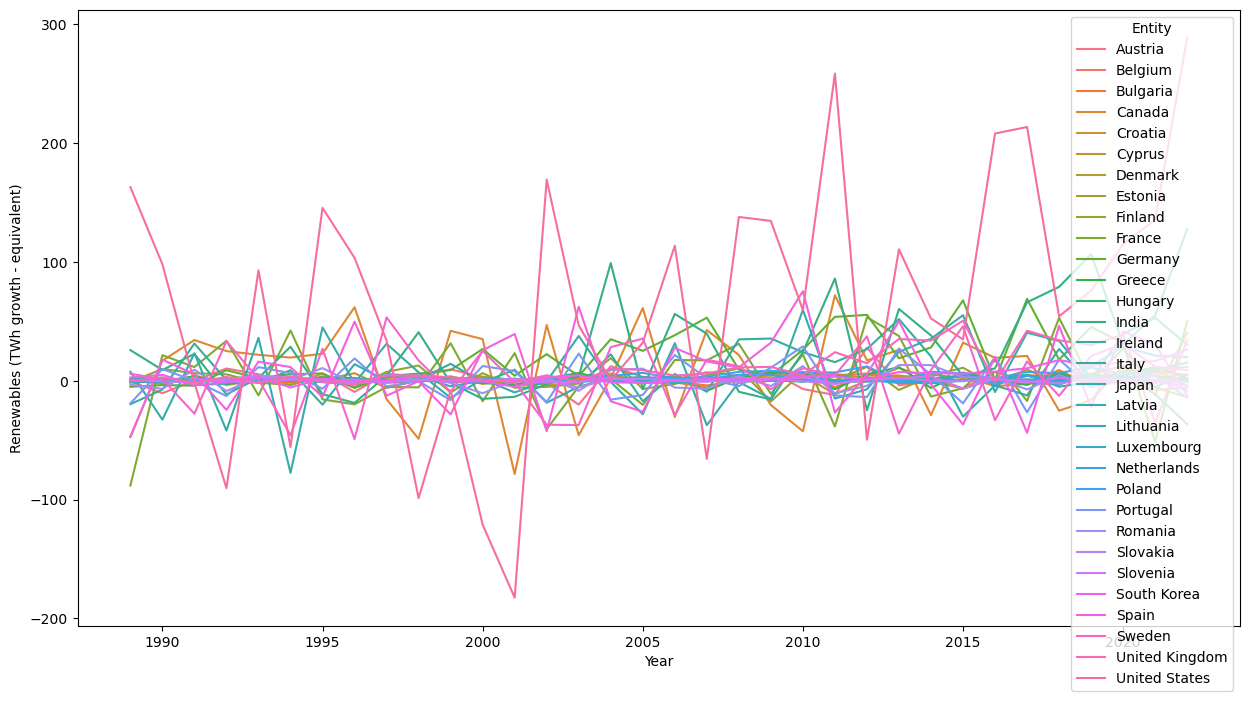

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables (TWh growth - equivalent)', hue='Entity', data=data_of_rg)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

# It become kind of mass. we will make the Europe as a whole

In [51]:
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
data_EU=data_of_rg[data_of_rg['Entity'].isin(EU)]

In [52]:
data_EU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 422 to 4569
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                823 non-null    object 
 1   Year                                  823 non-null    int64  
 2   Renewables (TWh growth - equivalent)  823 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.7+ KB


In [53]:
list_year=data_EU['Year'].unique()
list_year.sort()
data_of_rg_final=data_of_rg.copy()
for i in list_year:
    tdf=data_of_rg[data_of_rg['Year']==i]
    new_row = pd.DataFrame({'Entity': ["EU"], 'Year': [i],'Renewables (TWh growth - equivalent)':[tdf["Renewables (TWh growth - equivalent)"].sum()]})
    data_of_rg_final=pd.concat([data_of_rg_final,new_row],axis=0)
data_of_rg_final=data_of_rg_final[data_of_rg_final['Entity'].isin(EU)==False]
data_of_rg_final=data_of_rg_final.reindex()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

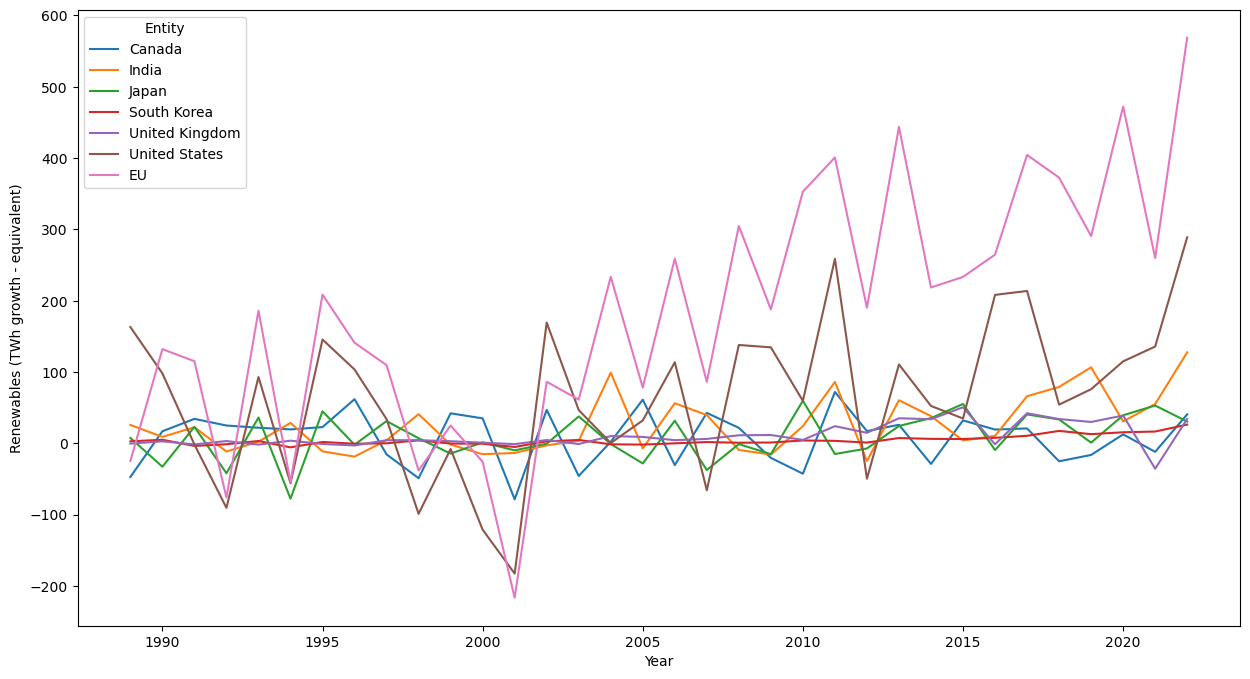

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables (TWh growth - equivalent)', hue='Entity', data=data_of_rg_final)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [56]:
countryies_to_study = ["United States", "South Korea", "Japan", "India","United Kingdom","Canada",'EU']

In [57]:
data_sum=pd.DataFrame(columns=["Entity","Renewables (TWh growth - equivalent)"])
for i in countryies_to_study:
    data_sum1=data_of_rg_final[data_of_rg_final['Entity']==i]
    sum1=data_sum1['Renewables (TWh growth - equivalent)'].sum()
    new_row = pd.DataFrame({'Entity': [i], 'Renewables (TWh growth - equivalent)':[sum1]})
    data_sum=pd.concat([data_sum,new_row],axis=0)
data_sum

,Entity,Renewables (TWh growth - equivalent)
0,United States,2208.084097
0,South Korea,146.425519
0,Japan,302.696474
0,India,891.526169
0,United Kingdom,378.469535
0,Canada,285.969784
0,EU,6253.272227


/Users/catillzhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


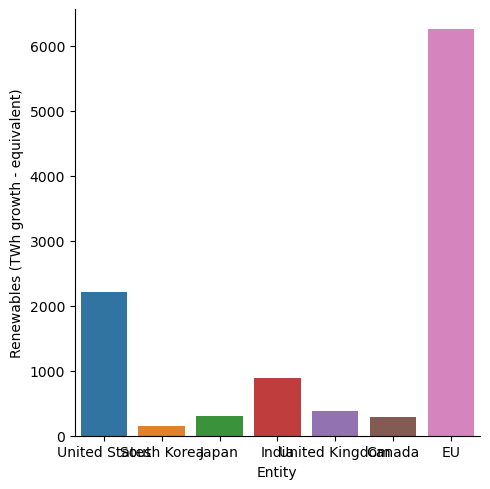

In [58]:
g=sb.catplot(x="Entity",y="Renewables (TWh growth - equivalent)",kind="bar",data=data_sum)

# we can conclude the following conclusions:
# 1. the EU make the  significiantly greatest contribution in pushing the green energy
# 2. those other countries have a less significiant results


# BUT WE ALSO NEDD TO PAY ATTENTION THAT:
# 1.IF THE COUNTRY HAVE A QUITE WEAK HISTORY OF ADOPTING THOSE CLEAN ENERGY, THE INCREASE MIGHT SEEM TO BE GREAT
# EG:THE INDIA is relatively poor in the past and the industry base is quite weak. so the increasement seem to be significiant
# on the other hand, that also explains why Japan has a weak increasement
# 2.The increase usage of clean energy may not indicate the decrease of using fossil fur. Becasue the overall need for poewer will increase by the time being.
# 3.We also has to take the population into consideration. As we treat EU as a whole, THE POPULATION IS GREAT, AND THE ENERGY CONSUMPTION IS ALSO GREAT!
# we can not simply give out a conclution of which country cares about the climate more merely based on this data.

# So let us study the percentage renewable energy composed in the overall energy consumption

In [19]:
data_perc_re=pd.read_csv("/Users/catillzhang/Downloads/share-electricity-renewables.csv")


In [20]:
data_perc_re=pd.read_csv("/Users/catillzhang/Downloads/share-electricity-renewables.csv")
countries_to_study = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden", "United States", "South Korea", "Japan", "India",
    "United Kingdom","Canada"
]
data_perc_re=data_perc_re[data_perc_re['Entity'].isin(countries_to_study)]
data_perc_re.drop("Code",axis=1,inplace=True)



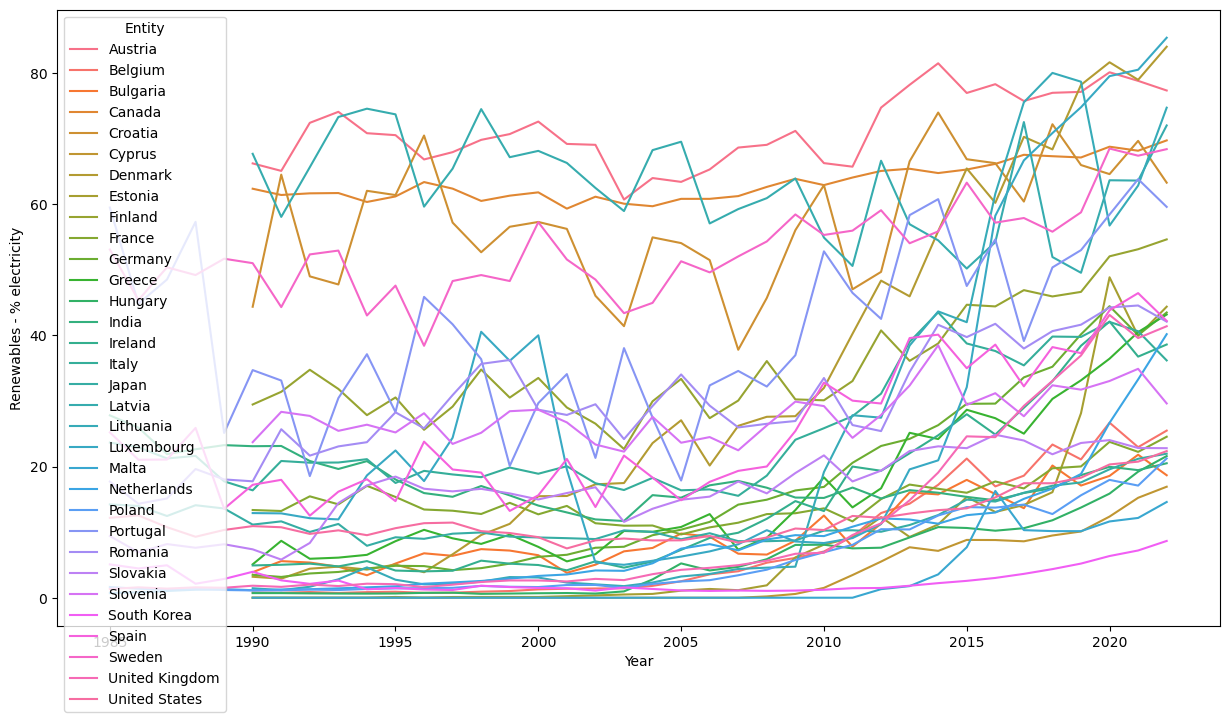

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables - % electricity', hue='Entity', data=data_perc_re)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [73]:
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
length=len(EU)
data_EU_prec_re=data_perc_re[data_perc_re['Entity'].isin(EU)]
list_year=data_EU_prec_re['Year'].unique()
list_year.sort()
data_perc_re_final=data_perc_re.copy()
for i in list_year:
    tdf=data_perc_re[data_perc_re['Year']==i]
    new_row = pd.DataFrame({'Entity': ["EU"], 'Year': [i],'Renewables - % electricity':[tdf["Renewables - % electricity"].sum()/length]})
    data_perc_re_final=pd.concat([data_perc_re_final,new_row],axis=0)
data_perc_re_final=data_perc_re_final[data_perc_re_final['Entity'].isin(EU)==False]
data_perc_re_final=data_perc_re_final[data_perc_re_final['Year']<2022]
data_perc_re_final=data_perc_re_final.reindex()


,Entity,Year,Renewables - % electricity
1085,Canada,1990,62.347790
1086,Canada,1991,61.393510
1087,Canada,1992,61.643684
1088,Canada,1993,61.688430
1089,Canada,1994,60.328484
...,...,...,...
0,EU,2017,40.051834
0,EU,2018,42.217610
0,EU,2019,43.956280
0,EU,2020,47.988236


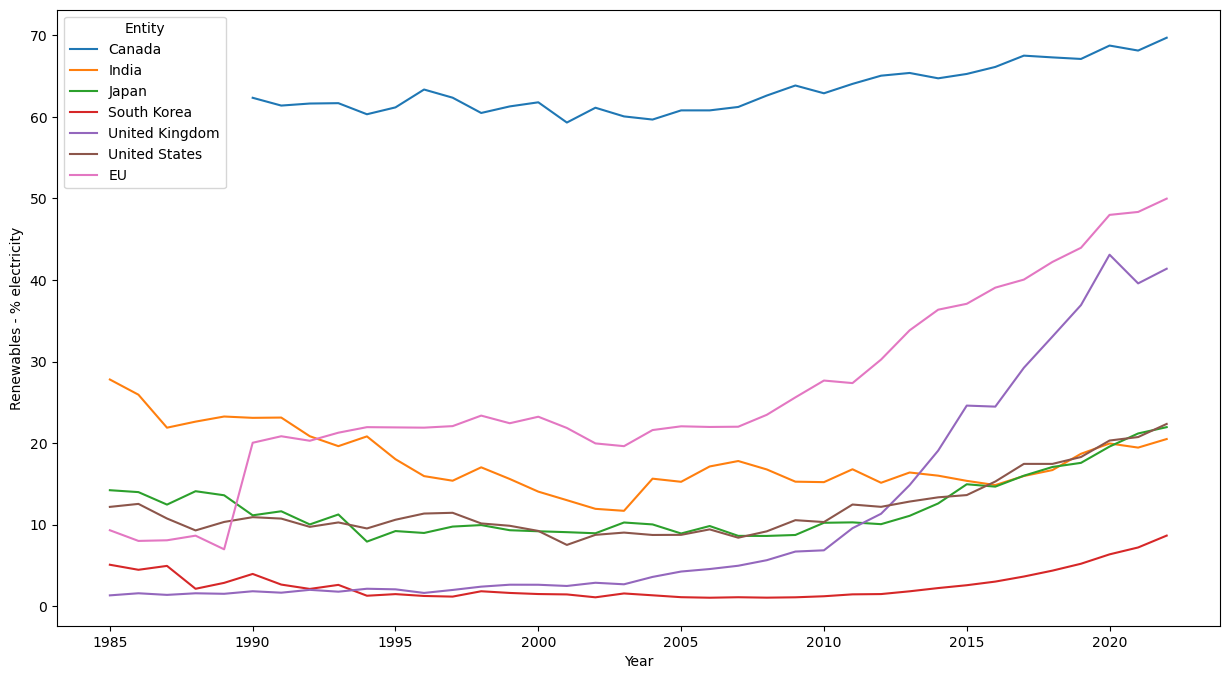

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Renewables - % electricity', hue='Entity', data=data_perc_re_final)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [24]:
data_div=pd.DataFrame(columns=["Entity","Renewables - % electricity"])
for i in countryies_to_study:
    data_A = data_perc_re_final[(data_perc_re_final['Entity'] == i) & (data_perc_re_final['Year'] == 1990)]
    data_B = data_perc_re_final[(data_perc_re_final['Entity'] == i) & (data_perc_re_final['Year'] == 2021)]
    div=data_B.iloc[0]["Renewables - % electricity"]-data_A.iloc[0]["Renewables - % electricity"]
    new_row = pd.DataFrame({'Entity': [i], 'Renewables - % electricity':[div]})
    data_div=pd.concat([data_div,new_row],axis=0)
data_div

,Entity,Renewables - % electricity
0,United States,9.825707
0,South Korea,3.246265
0,Japan,10.037313
0,India,-3.648930
0,United Kingdom,37.753722
0,Canada,5.791836
0,EU,28.304950


/Users/catillzhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


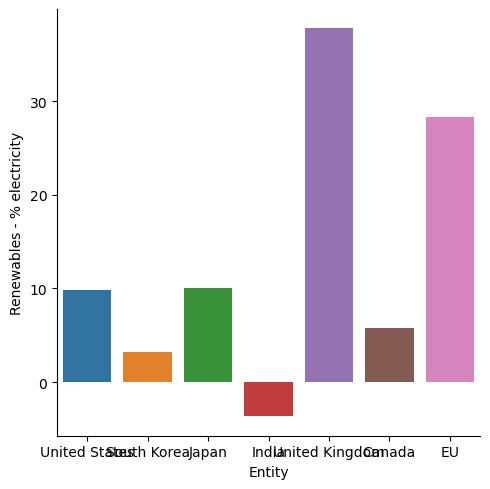

In [25]:
g=sb.catplot(x="Entity",y="Renewables - % electricity",kind="bar",data=data_div)

# From this chart, we can conclude that:
# 1.Just like what we have explain in the previous part,the increase in the absolute amount in the clean energy comsumption might not realy indicate the change in the energy structure.

# just look at india。 although the overall consumption of clean energy increase, the percentage of it increases these year.

# 2.We can not judge the effort merely on comparing the percentage. The original energy struture of the countries also counts
# like Canada, which has a relatively long history of using clean energy, so we can not say it has made the biggest effort
# Compared to UK and EU, the change is significant. Both of them hava a history of depending on fossil fuel, and we can not see the percentage of clean energy boost greatly
# So we can conclude that they are the countries that really make efforts in handling climate change

# Then we come to secondary stage of this problems---how long would it take for these country to step into a eco-friendly coutry.
# We formulate this problems as "By when can those countries reach a 95% portion of clean energy in the overall energy comsumtion"?

# Model 1: adapting Multivarible liner regression as well as random forest

# It is important to figure out that we need more features to do the prediction
# Bacause the GDP, the population, the industrial structure, these factors can play a significant roling in affecting these progress

# Model2: adapting nuture night work to predict.

In [80]:
data_popu=pd.read_csv("/Users/catillzhang/Downloads/population-and-demography.csv")
data_popu=data_popu[["Country name","Year","Population"]]
countries_to_study = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden", "United States", "South Korea", "Japan", "India",
    "United Kingdom","Canada"
]
data_popu=data_popu[data_popu['Country name'].isin(countries_to_study)]
data_popu.head()
countryies_to_study = ["United States", "South Korea", "Japan", "India","United Kingdom","Canada",'EU']

In [89]:
EU = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
    "Spain", "Sweden"
]
length=len(EU)
data_popu_EU=data_popu[data_popu['Country name'].isin(EU)]
list_year=data_EU_prec_re['Year'].unique()
list_year.sort()
data_popu_final=data_popu.copy()
list_year=data_popu['Year'].unique()
list_year.sort()
for i in list_year:
    tdf=data_popu[data_popu['Year']==i]
    new_row = pd.DataFrame({'Country name': ["EU"], 'Year': [i],'Population':[tdf['Population'].sum()]})
    data_popu_final=pd.concat([data_popu_final,new_row],axis=0)
data_popu_final=data_popu_final[data_popu_final['Country name'].isin(EU)==False]
data_popu_final=data_popu_final.reindex()
data_popu_final=data_popu_final[data_popu_final['Year']>1989]
data_popu_final=data_popu_final.reindex()
data_popu_final
data_popu_final.to_csv('/Users/catillzhang/Downloads/日你妈操了.csv', index=False)

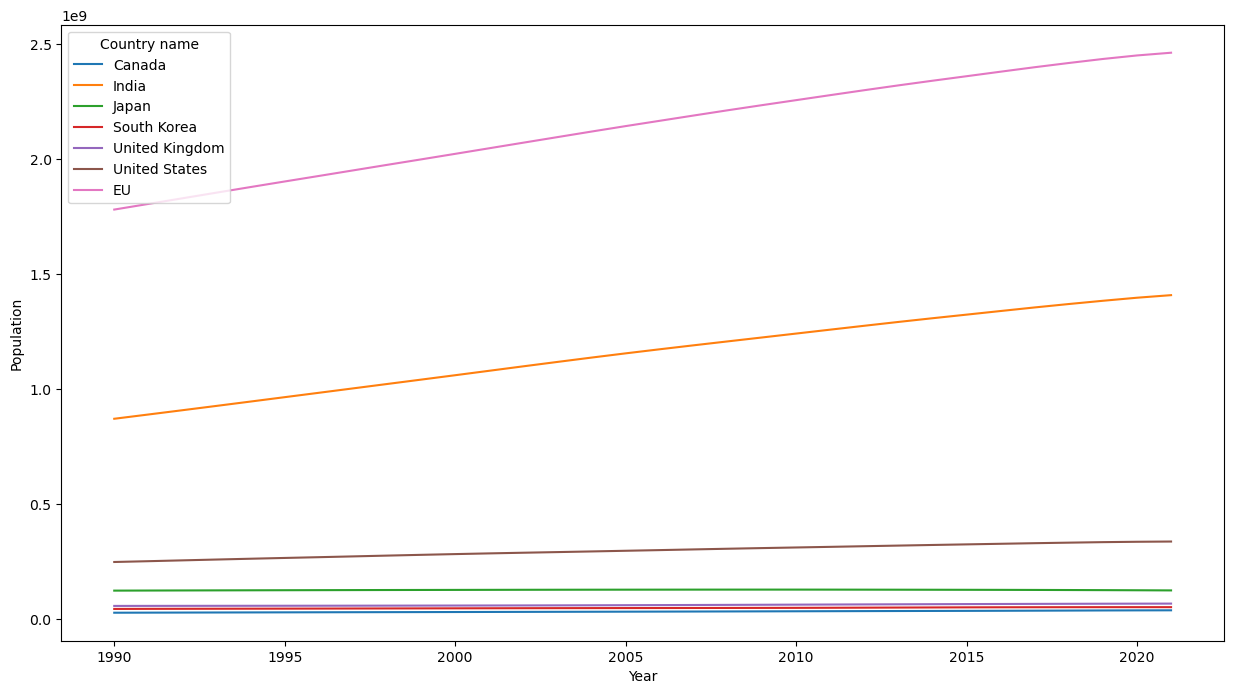

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 lineplot 直接绘制
g = sns.lineplot(x='Year', y='Population', hue='Country name', data=data_popu_final)

# 调整图表大小，确保所有细节都清晰可见
plt.gcf().set_size_inches(15, 8)

# 显示图表
plt.show()

In [36]:
list_year=data_popu['Year'].unique()
list_year.sort()
list_year

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

In [90]:
data_popu_clean=pd.DataFrame(data_popu_final['Population'])
data_perc_re_final = data_perc_re_final[data_perc_re_final['Year']>1989]
data_perc_re_final=data_perc_re_final.reset_index(drop=True)
data_popu_clean = data_popu_clean.reset_index(drop=True)
data_with_popu = pd.concat([data_perc_re_final, data_popu_clean], axis=1)
data_with_popu

,Entity,Year,Renewables - % electricity,Population
0,Canada,1990,62.347790,27657206
1,Canada,1991,61.393510,28015762
2,Canada,1992,61.643684,28347644
3,Canada,1993,61.688430,28668168
4,Canada,1994,60.328484,28981190
...,...,...,...,...
219,EU,2017,40.051834,2397995780
220,EU,2018,42.217610,2416353006
221,EU,2019,43.956280,2433818692
222,EU,2020,47.988236,2449126268


In [92]:
data_with_popu.to_csv('/Users/catillzhang/Downloads/data_with_population_feature.csv', index=False)

In [ ]:
data